Hierarchical Pachinko Allocation

Hierarchical Pachinko allocation (HPAM) is a special type of PAM model that creates a hierarchy of topics like HLDA, but since PAM uses a DAG instead of a tree, child topics can have multiple parent topics. HPAM does this by giving each node at every level have a Dirichlet distribution over the vocabulary itself rather than only the lowest level of topics having a distribution over the vocabulary. The Dirichlet distributions at interior nodes are critical to HPAM because their parameters represents the hierarchy through the parameters of these Dirichlet distributions, and also allow computation to be greatly reduced compared to HLDA.

To my knowledge, the only the reason to use HLDA over HPAM would be if topics could only have one parent topic. Otherwise, go with HPAM. Tomotopy has an implementation of HPAM, which takes the same paramters as HPAM, k1k1 and k2k2 which correspond to the number of nodes at the first and second levels of the DAG.

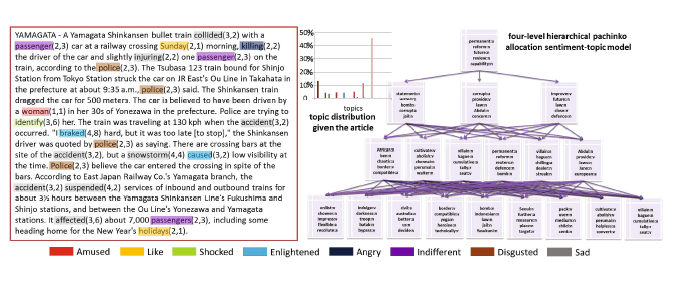

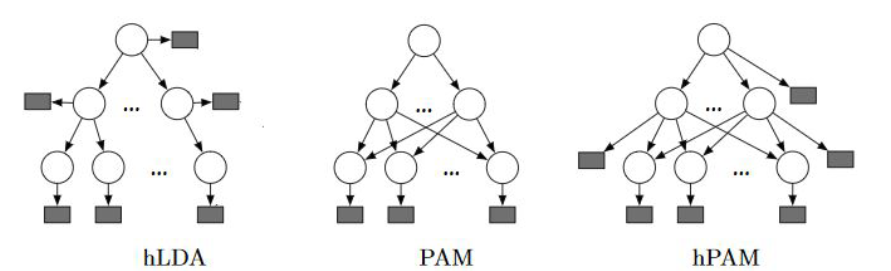

In [1]:
import tomotopy as tp
from collections import Counter

file_name = 'U.S.Patents.txt'

mdl = tp.HPAModel(k1=5, k2=100, min_cf=100, rm_top=200)
for line in open(file_name, 'r'):
    document = line.strip().split()
    mdl.add_doc(document)
        
print('Starting training model')
iterations = 10
for i in range(0, 100, iterations):
    mdl.train(iterations)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))        
        
root_index = 0
words = mdl.get_topic_words(root_index, top_n=30)
print('Root Topic #%s' % root_index)
print('Top 10 words of Root Topic #%s: %r' % (root_index, words))

for k in range(1, 1 + mdl.k1):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 1 Topic #%s' % k)
    print('    Top 10 words of Level 1 Topic #%s: %r' % (k, words))
    
for k in range(1 + mdl.k1, 1 + mdl.k1 + mdl.k2):
    words = mdl.get_topic_words(k, top_n=30)
    print('\n\nLevel 2 Topic #%s' % (k - mdl.k1, ))
    print('    Top 10 words of Level 2 Topic #%s: %r' % (k - mdl.k1, words))    
 

Starting training model
Iteration: 0	Log-likelihood: -10.55719647386167
Iteration: 10	Log-likelihood: -10.047733866122583
Iteration: 20	Log-likelihood: -9.968219087261119
Iteration: 30	Log-likelihood: -9.938295784799998
Iteration: 40	Log-likelihood: -9.925415073333138
Iteration: 50	Log-likelihood: -9.914470320690691
Iteration: 60	Log-likelihood: -9.90631657172305
Iteration: 70	Log-likelihood: -9.897149677274959
Iteration: 80	Log-likelihood: -9.88684340864712
Iteration: 90	Log-likelihood: -9.872924161300713
Root Topic #0
Top 10 words of Root Topic #0: [('each', 0.04747038707137108), ('more', 0.04596419632434845), ('has', 0.03499410301446915), ('into', 0.031052900478243828), ('such', 0.030023669824004173), ('In', 0.027864795178174973), ('when', 0.024300141260027885), ('through', 0.024249935522675514), ('being', 0.021588997915387154), ('than', 0.021262655034661293), ('other', 0.020484456792473793), ('"An', 0.019153987988829613), ('"The', 0.01867702603340149), ('and/or', 0.0178486220538616

In [2]:
for preset in ('u_mass', 'c_uci', 'c_npmi', 'c_v'):
    coh = tp.coherence.Coherence(mdl, coherence=preset)
    average_coherence = coh.get_score()
    coherence_per_topic = [coh.get_score(topic_id=k) for k in range(mdl.k)]
    print('==== Coherence : {} ===='.format(preset))
    print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
    print()

==== Coherence : u_mass ====
Average: -5.784152127860325 
Per Topic: [-2.146377852011395, -11.609985224873729, -3.3719014044729794, -3.8475755807108314, -7.944920577232689]

==== Coherence : c_uci ====
Average: -2.851606145626293 
Per Topic: [0.22409941767638264, -8.36455879871904, -0.9543321198742739, -2.4819588197639417, -2.6812804074505925]

==== Coherence : c_npmi ====
Average: -0.08286253860921375 
Per Topic: [0.02821109870304715, -0.29120699673057415, -0.03731246123923883, -0.06527627580562785, -0.04872805797367514]

==== Coherence : c_v ====
Average: 0.5944507083296776 
Per Topic: [0.5627320736646653, 0.6309754878282547, 0.549959959089756, 0.6668230712413787, 0.5617629498243332]

